## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [1]:
%matplotlib inline 

# from imports import *
import torch
import matplotlib.pyplot as plt
import numpy as np
from algorithms import *
from Utilities import display_results
import sys
sys.path.append('problems/')
sys.path.append('denoisers/')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
from problems.PR import PhaseRetrieval
from denoisers.BM3D import BM3DDenoiser

# Figures 1: Compare Image Fidelity for Different Algorithms 

In [3]:
height = 32
width = 32
alpha = 1       # ratio measurements / dimensions
snr = 5.

main_problem = PhaseRetrieval(img_path='./data/Set12/01.png', H=height, W=width, num_meas = alpha*height*width, snr=snr)

0.4413992280835576 1024


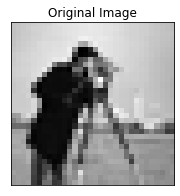

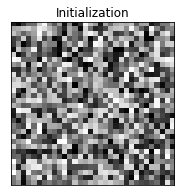

In [4]:
main_problem.display(show_measurements=False, save_results=True)
print(main_problem.sigma, main_problem.M)


In [5]:
denoiser = BM3DDenoiser()
results_svrg = pnp_svrg(main_problem, denoiser=denoiser, eta=2e-1, tt=60, T2=50, mini_batch_size=100, verbose=True, converge_check=False)

0 0 Before denoising:  8.770856251581304
After denoising update: 0 0 11.01493988660042
0 1 Before denoising:  10.256845554255495
After denoising update: 0 1 11.506649980089705
0 2 Before denoising:  10.911344162167211
After denoising update: 0 2 12.222895959607051
0 3 Before denoising:  10.730341009710418
After denoising update: 0 3 12.777508034263272
0 4 Before denoising:  11.341037273552022
After denoising update: 0 4 14.16718111939929
0 5 Before denoising:  12.059863987481208
After denoising update: 0 5 14.67332777471739
0 6 Before denoising:  11.846225502005685
After denoising update: 0 6 14.976630401615159
0 7 Before denoising:  12.478058710693434
After denoising update: 0 7 15.388164833848425
0 8 Before denoising:  12.420433676338725
After denoising update: 0 8 15.489559233368688
0 9 Before denoising:  12.880176501126499
After denoising update: 0 9 15.801610906768445
0 10 Before denoising:  12.343647300567284
After denoising update: 0 10 15.975068797716832
0 11 Before denoising: 

Output PSNR: 27.0	Change in PSNR: 1.35	Gradient Time: 57.86	Denoising Time: 57.86


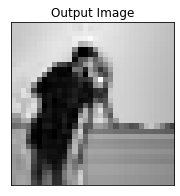

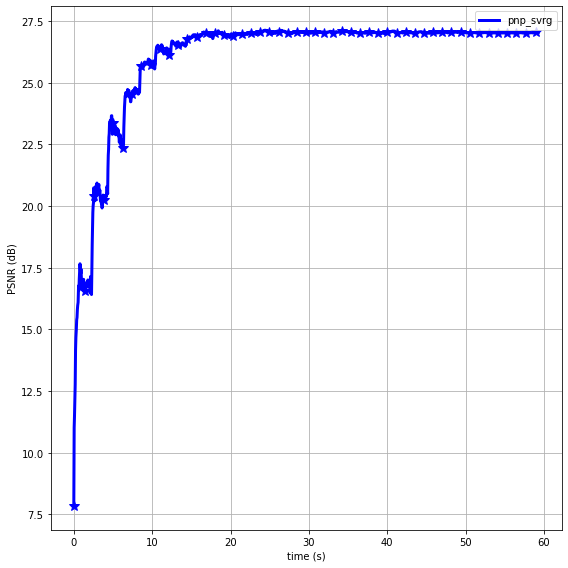

In [6]:
master_psnr_fig = display_results(main_problem, results_svrg, save_results=True)

In [7]:
denoiser = BM3DDenoiser()
results_sgd = pnp_sgd(main_problem, denoiser=denoiser, eta=1e-1, tt=60, mini_batch_size=100, verbose=True, converge_check=False)

0 Before denoising:  8.022668609589669
0 After denoising:  10.719894708393054
1 Before denoising:  10.850911686146707
1 After denoising:  11.016554558487488
2 Before denoising:  11.205435972242668
2 After denoising:  11.5325517820386
3 Before denoising:  11.829088895721524
3 After denoising:  12.178314328544912
4 Before denoising:  12.333548479734747
4 After denoising:  12.715479198871087
5 Before denoising:  12.943364534614176
5 After denoising:  13.178426786022307
6 Before denoising:  13.418631252817267
6 After denoising:  13.73909851526916
7 Before denoising:  14.005316034610393
7 After denoising:  14.171478254506214
8 Before denoising:  14.443068741362602
8 After denoising:  14.66642302693729
9 Before denoising:  14.990956097090171
9 After denoising:  15.172793016051273
10 Before denoising:  15.559082113792595
10 After denoising:  15.801924129643174
11 Before denoising:  16.134349176180304
11 After denoising:  16.279171463346845
12 Before denoising:  16.558869475983325
12 After den

Output PSNR: 24.5	Change in PSNR: 0.71	Gradient Time: 58.44	Denoising Time: 58.44


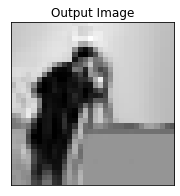

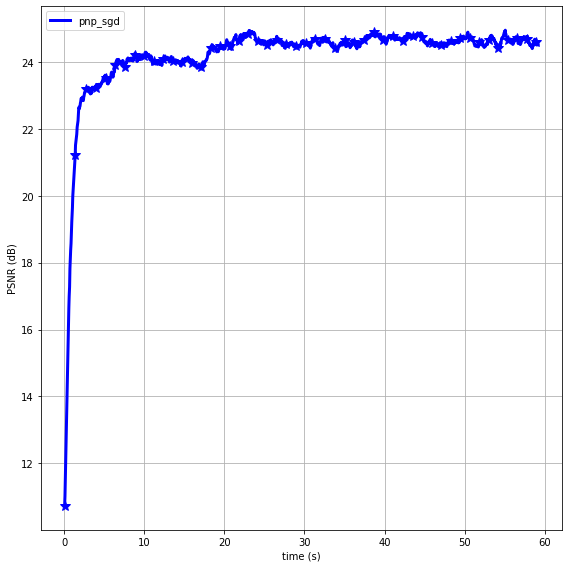

In [8]:
master_psnr_fig = display_results(main_problem, results_sgd, save_results=True)

In [9]:
denoiser = BM3DDenoiser()
results_gd = pnp_gd(main_problem, denoiser=denoiser, eta=1e-1, tt=60, verbose=True)

0 Before denoising:  8.335181139686576
0 After denoising:  10.77366085515653
1 Before denoising:  11.382376874992703
1 After denoising:  11.330358127103505
2 Before denoising:  11.980748708566242
2 After denoising:  11.92775743231148
3 Before denoising:  12.591041318595622
3 After denoising:  12.554470393834388
4 Before denoising:  13.209035982283668
4 After denoising:  13.176739029072465
5 Before denoising:  13.839062928786419
5 After denoising:  13.799325809340866
6 Before denoising:  14.450949347033212
6 After denoising:  14.409163081310869
7 Before denoising:  15.049625244421671
7 After denoising:  15.002141998682406
8 Before denoising:  15.627837446932872
8 After denoising:  15.575408426599903
9 Before denoising:  16.191099789456484
9 After denoising:  16.131316394001736
10 Before denoising:  16.719002152552264
10 After denoising:  16.650321859732166
11 Before denoising:  17.22278010822997
11 After denoising:  17.145897211924257
12 Before denoising:  17.693298973420905
12 After de

Output PSNR: 26.0	Change in PSNR: 0.67	Gradient Time: 10.53	Denoising Time: 10.53


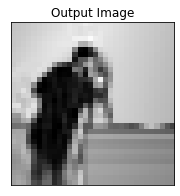

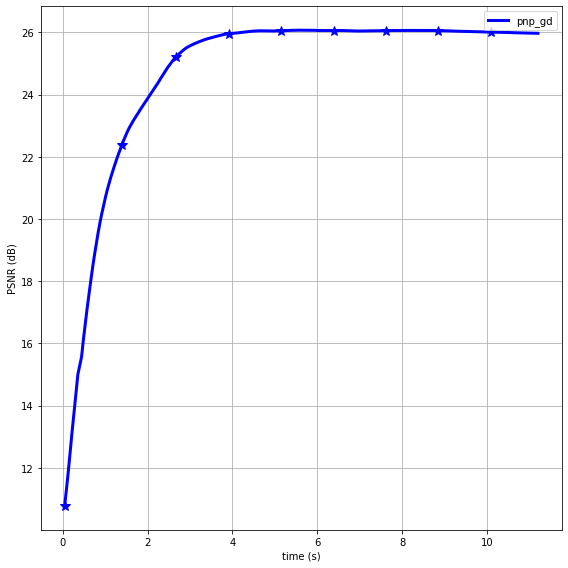

In [10]:
master_psnr_fig = display_results(main_problem, results_gd, save_results=True)

In [11]:
denoiser = BM3DDenoiser()
results_saga = pnp_saga(main_problem, denoiser=denoiser, eta=1e-1, tt=60, mini_batch_size=100, hist_size=16, verbose=True)

0 Before denoising:  7.910508582883576
0 After denoising:  10.788126190216135
1 Before denoising:  10.167762491973333
1 After denoising:  11.35369122773453
2 Before denoising:  10.583476712144455
2 After denoising:  11.579732763722031
3 Before denoising:  11.10758028914341
3 After denoising:  12.201501284559775
4 Before denoising:  11.303359255128388
4 After denoising:  12.54399758066281
5 Before denoising:  11.871277263268603
5 After denoising:  12.904257789838443
6 Before denoising:  12.430523151253471
6 After denoising:  13.509383924219794
7 Before denoising:  12.937273504875924
7 After denoising:  13.862476302302769
8 Before denoising:  13.32523004373349
8 After denoising:  14.331281291225658
9 Before denoising:  13.84105320656582
9 After denoising:  14.725799160711986
10 Before denoising:  14.204011677227111
10 After denoising:  15.028540659084314
11 Before denoising:  14.767240229095895
11 After denoising:  15.396263677403578
12 Before denoising:  15.393680636392466
12 After deno

Output PSNR: 21.2	Change in PSNR: 0.87	Gradient Time: 58.72	Denoising Time: 58.72


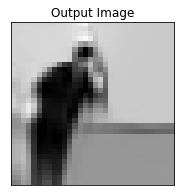

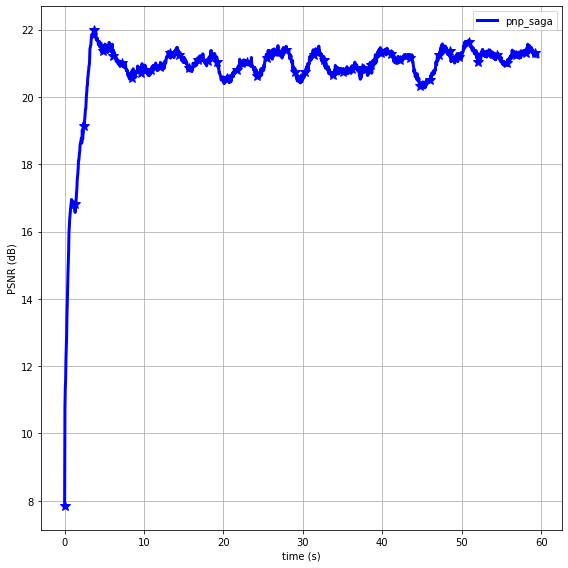

In [12]:
master_psnr_fig = display_results(main_problem, results_saga, save_results=True)

In [32]:
denoiser = BM3DDenoiser(sigma_modifier=0.8, decay=0.995)
results_sarah = pnp_sarah(main_problem, denoiser=denoiser, eta=3e-2, tt=60, T2=10, mini_batch_size=100, verbose=True)

After gradient update: 0 0 7.959542468987841
After denoising update: 0 0 10.70155595189906
After gradient update: 0 1 10.870146471116545
After denoising update: 0 1 10.922756429843954
After gradient update: 0 2 11.085418367503568
After denoising update: 0 2 11.10324610537059
After gradient update: 0 3 11.237934896575652
After denoising update: 0 3 11.27149253305573
After gradient update: 0 4 11.3694345413918
After denoising update: 0 4 11.425526969390834
After gradient update: 0 5 11.507599700812591
After denoising update: 0 5 11.599858646286108
After gradient update: 0 6 11.647481815810101
After denoising update: 0 6 11.772154207091605
After gradient update: 0 7 11.786724342738616
After denoising update: 0 7 11.93018370006657
After gradient update: 0 8 11.736809053275588
After denoising update: 0 8 11.967320606700058
After gradient update: 0 9 11.632630897472492
After denoising update: 0 9 11.899604678289863
After gradient update: 1 0 12.062807474449631
After denoising update: 1 0 12.

Output PSNR: 23.2	Change in PSNR: 0.49	Gradient Time: 18.99	Denoising Time: 18.99


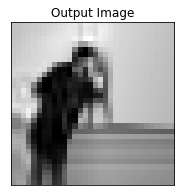

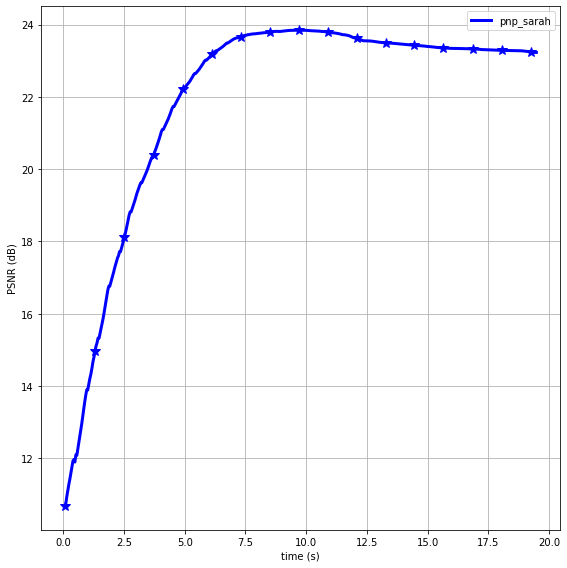

In [33]:
master_psnr_fig = display_results(main_problem, results_sarah, save_results=True)

# Figure 2(a): Compare PSNR over time using NLM

## Figure 2(b): Compare Sampling Ratio for each PnP Algorithm

## Figure 3: Compare Image Denoising Routines with PnP-SVRG using RGB Images